# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchWindowException, WebDriverException

In [3]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option("useAutomationExtension", False)

In [4]:
# Configure Chrome WebDriver Service
chrome_service = Service(ChromeDriverManager().install())

In [5]:
browser = Browser('chrome', service=chrome_service, options=chrome_options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Get the HTML content
html = browser.html

In [8]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [9]:
soup.title

<title>Mars Temperature Data</title>

In [10]:
# Extract all rows of data
# Find the table element assuming it's a table
table = soup.find('table')

# Extract all rows from the table
rows = table.find_all('tr')

# Iterate through rows and print them for example
for row in rows:
    print(row.text.strip())  # .strip() to remove any leading/trailing whitespace

id
terrestrial_date
sol
ls
month
min_temp
pressure
2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
rows_data = []

In [11]:
# Create an empty list
ids = []
terrestrial_dates = []
sols = []
ls_values = []
months = []
min_temps = []
pressures = []
# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the first row assuming it's the header row
    cells = row.find_all('td')
    if len(cells) == 7:  # Assuming there are 7 columns as per the description
        ids.append(cells[0].text.strip())
        terrestrial_dates.append(cells[1].text.strip())
        sols.append(cells[2].text.strip())
        ls_values.append(cells[3].text.strip())
        months.append(cells[4].text.strip())
        min_temps.append(cells[5].text.strip())
        pressures.append(cells[6].text.strip())

In [16]:
for row in rows[1:]:  # Skip the first row assuming it's the header row
    cells = row.find_all('td')
    if len(cells) == 7:  # Assuming there are 7 columns as per the description
        row_data = [cell.text.strip() for cell in cells]
        rows_data.append(row_data)

In [12]:
# Define column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [17]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_data, columns=column_names)

In [19]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [23]:
# Change data types for data analysis
df['id'] = df['id'].astype('object')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype('float64')
df['pressure'] = df['pressure'].astype('float64')


In [24]:
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [27]:
# Create a DataFrame
df = pd.DataFrame(rows_data, columns=column_names)

In [29]:
num_months = df['month'].nunique()
num_months

12

In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [32]:
# 2. How many Martian days' worth of data are there?

df['sol'] = pd.to_numeric(df['sol'], errors='coerce')

# Calculate the number of unique sols
num_sols = df['sol'].nunique()

print(f"There are {num_sols} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [34]:
# 3. What is the average low temperature by month?

# Convert 'min_temp' column to numeric in case it's stored as string or object
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Calculate average low temperature by month
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the result
print("Average low temperature by month:")
print(avg_low_temp_by_month)

Average low temperature by month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Minimum Temperature per Month'}, xlabel='month', ylabel='avg min temp (C)'>

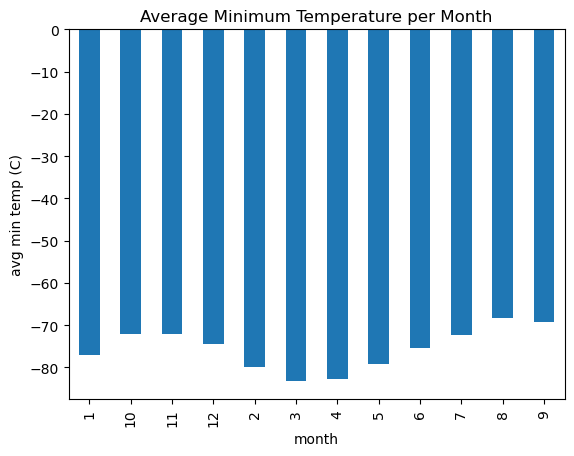

In [36]:
avg_low_temp_by_month.plot.bar(x=avg_low_temp_by_month.index, y=avg_low_temp_by_month.values, 
                      xlabel = 'month', ylabel = 'avg min temp (C)',
                      title = 'Average Minimum Temperature per Month')

Coldest Month: 3 
Hottest Month: 8


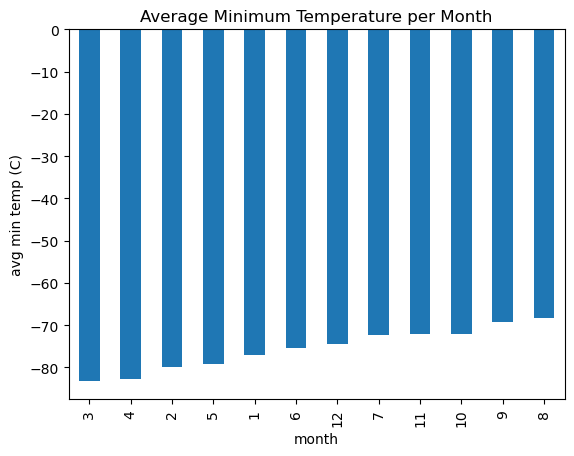

In [37]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the values in ascending order
avg_min_temp = avg_low_temp_by_month.sort_values()
# Plot the values to obtain the hottest and coldest month
avg_min_temp.plot.bar(x=avg_min_temp.index, y=avg_min_temp.values, 
                      xlabel = 'month', ylabel = 'avg min temp (C)',
                      title = 'Average Minimum Temperature per Month')
# Display the result
print(f'Coldest Month: {avg_min_temp.index[0]} \nHottest Month: {avg_min_temp.index[11]}')

# Save the plot as a image file
plt.savefig('avg_min_temp.png')

In [39]:
# Convert 'pressure' column to numeric
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

In [40]:
# Group by Martian month and calculate the mean pressure
avg_pressure = df.groupby('month')['pressure'].mean()

# Display result
print(f'The average pressure by month is: \n{avg_pressure}')

The average pressure by month is: 
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Lowest Average Pressure Month: 6 
Highest Average Pressure Month: 9


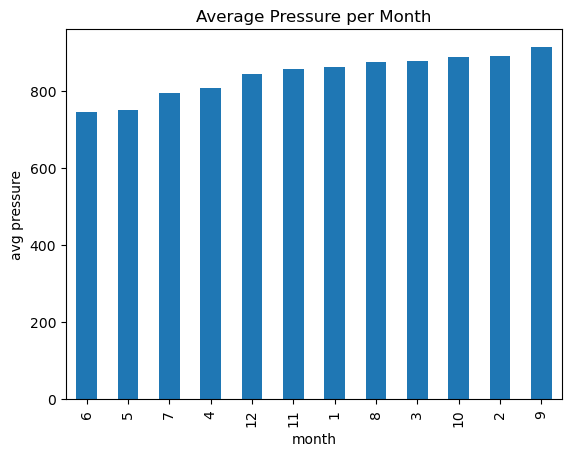

In [42]:
# Sort the values in ascending order
avg_pressure = avg_pressure.sort_values()
# Plot the values to obtain the months with the highest and lowest pressure average
avg_pressure.plot.bar(x=avg_pressure.index, y=avg_pressure.values, 
                      xlabel = 'month', ylabel = 'avg pressure',
                      title = 'Average Pressure per Month')
# Display the result
print(f'Lowest Average Pressure Month: {avg_pressure.index[0]} \nHighest Average Pressure Month: {avg_pressure.index[11]}')

# Save the plot as a image file
plt.savefig('avg_pressure.png')

There is a peak around 690-740 and another peak around 1375-1425. 
Therefore, one Martian year is around 685 terrestial days in the plot


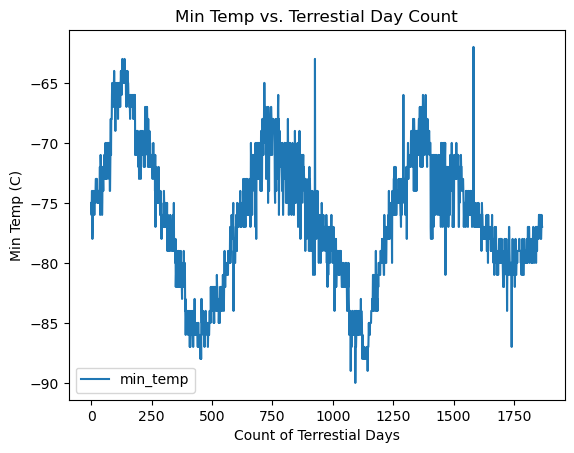

In [43]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Reset the index of mars_weather_df
mars_weather_df = df.reset_index()
# Create a plot that looks at min_temp and the count of terrestial_date (the day count is in the index)
mars_weather_df.plot.line(x='index', y='min_temp', 
                          title='Min Temp vs. Terrestial Day Count').set(
                              xlabel='Count of Terrestial Days', 
                              ylabel='Min Temp (C)')
# Display the results
print(f'There is a peak around 690-740 and another peak around 1375-1425. \nTherefore, one Martian year is around 685 terrestial days in the plot')

# Save the plot as a image file
plt.savefig('min_temp_day_count.png')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [44]:
# Write the data to a CSV
mars_weather_df.to_csv("mars_weather_data.csv", index=False)

In [45]:
browser.quit()